In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data = pd.read_excel("/content/Walmart_sales.xlsx")

In [ ]:
Data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,2010-01-10 00:00:00,1453329.50,0,71.89,2.603,211.671989,7.838,1,2010
1,2,2010-01-10 00:00:00,1827440.43,0,69.24,2.603,211.329874,8.163,1,2010
2,3,2010-01-10 00:00:00,358784.10,0,73.60,2.603,214.984655,7.564,1,2010
3,4,2010-01-10 00:00:00,1842821.02,0,63.96,2.619,126.234600,7.127,1,2010
4,5,2010-01-10 00:00:00,283178.12,0,71.10,2.603,212.226946,6.768,1,2010


In [ ]:
Data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,6.475524,2010.965657
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,3.321797,0.797046
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,12.000000,2012.000000


The features are potential candidates:


*   Store: This represents the store number.
*   Holiday_Flag: A binary flag indicating whether the week includes a holiday.

*   Temperature: The average temperature during the week.
*   Fuel_Price: The fuel price during the week.

*   CPI (Consumer Price Index): A measure of inflation and consumer spending.
*   Unemployment: The unemployment rate during the week.


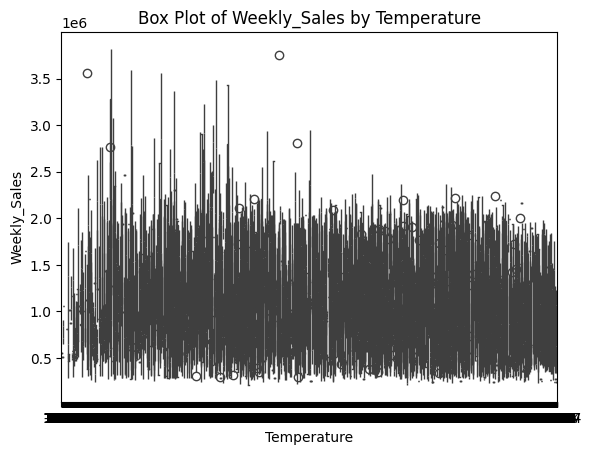

In [ ]:
sns.boxplot(x='Temperature', y='Weekly_Sales', data=Data)
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.title('Box Plot of Weekly_Sales by Temperature')
plt.show()

# New Section

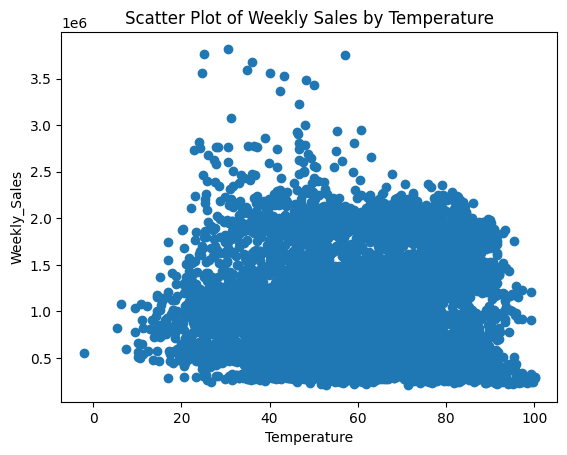

In [ ]:
plt.scatter(Data['Temperature'], Data['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.title('Scatter Plot of Weekly Sales by Temperature')
plt.show()


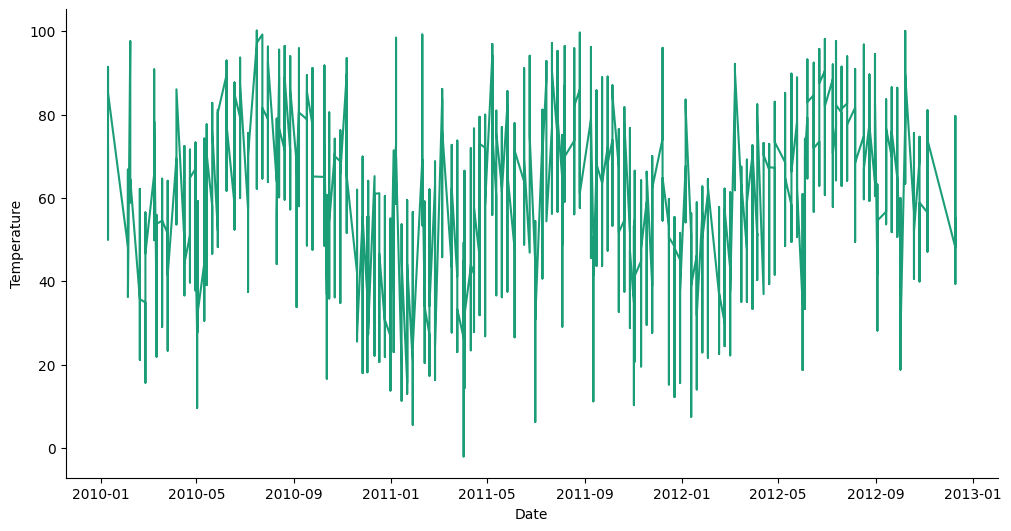

In [ ]:
# @title Date vs Temperature

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Temperature']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Temperature')

In [ ]:
Data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
month           0
year            0
dtype: int64

In [ ]:
Data.drop_duplicates()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,2010-01-10 00:00:00,1453329.50,0,71.89,2.603,211.671989,7.838,1,2010
1,2,2010-01-10 00:00:00,1827440.43,0,69.24,2.603,211.329874,8.163,1,2010
2,3,2010-01-10 00:00:00,358784.10,0,73.60,2.603,214.984655,7.564,1,2010
3,4,2010-01-10 00:00:00,1842821.02,0,63.96,2.619,126.234600,7.127,1,2010
4,5,2010-01-10 00:00:00,283178.12,0,71.10,2.603,212.226946,6.768,1,2010
...,...,...,...,...,...,...,...,...,...,...
6430,41,31-12-2010,1001790.16,1,25.19,2.829,191.255700,7.508,12,2010
6431,42,31-12-2010,428953.60,1,49.67,3.148,127.087677,9.003,12,2010
6432,43,31-12-2010,534740.30,1,48.61,2.943,203.417684,10.210,12,2010
6433,44,31-12-2010,241937.11,1,26.79,2.868,127.087677,7.610,12,2010


In [ ]:
Data['Date'] = pd.to_datetime(Data['Date'])

In [ ]:
Data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,1,2010
1,2,2010-01-10,1827440.43,0,69.24,2.603,211.329874,8.163,1,2010
2,3,2010-01-10,358784.10,0,73.60,2.603,214.984655,7.564,1,2010
3,4,2010-01-10,1842821.02,0,63.96,2.619,126.234600,7.127,1,2010
4,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,1,2010


In [ ]:
Data['Month'] = Data['Date'].dt.month
Data['Year'] = Data['Date'].dt.year

In [ ]:
average_sales_per_month = Data.groupby('Month')['Weekly_Sales'].mean()

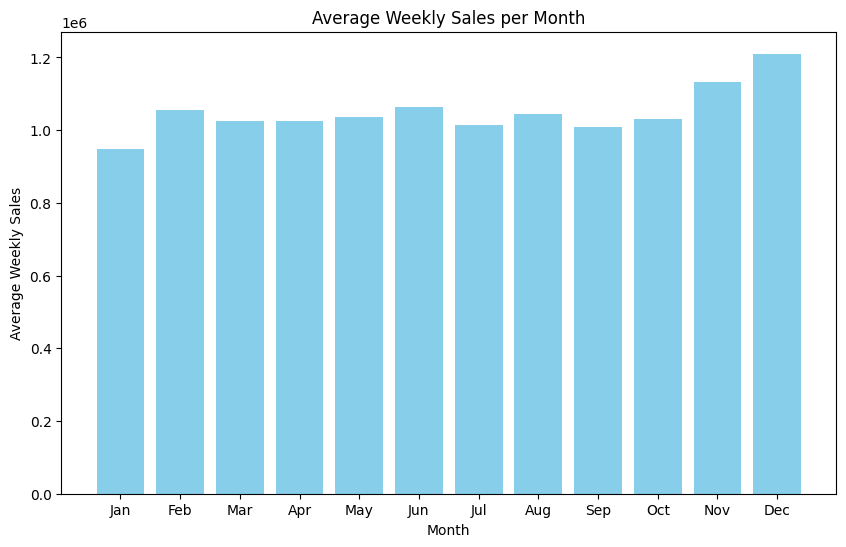

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(average_sales_per_month.index, average_sales_per_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales per Month')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
yearly_average = Data.groupby(Data['Date'].dt.to_period('Y'))['Weekly_Sales'].mean()

In [ ]:
yearly_average


Date
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Freq: A-DEC, Name: Weekly_Sales, dtype: float64

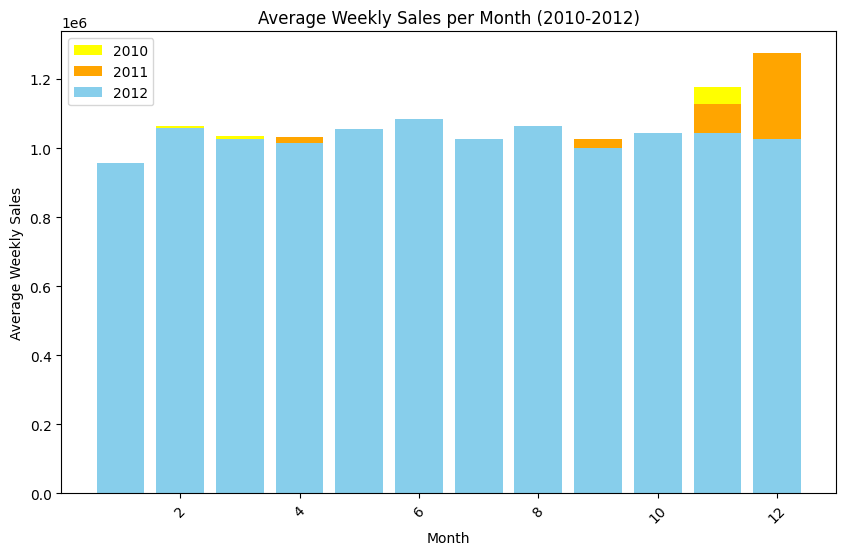

In [ ]:
average_sales = Data.groupby(['Year', 'Month'])['Weekly_Sales'].mean()

# Separate DataFrames for each year
df_2010 = average_sales.loc[2010]
df_2011 = average_sales.loc[2011]
df_2012 = average_sales.loc[2012]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(df_2010.index, df_2010.values, label='2010', color='yellow')
plt.bar(df_2011.index, df_2011.values, label='2011', color='orange')
plt.bar(df_2012.index, df_2012.values, label='2012', color='skyblue')

plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales per Month (2010-2012)')
plt.legend()
plt.xticks(rotation=45)

plt.show()

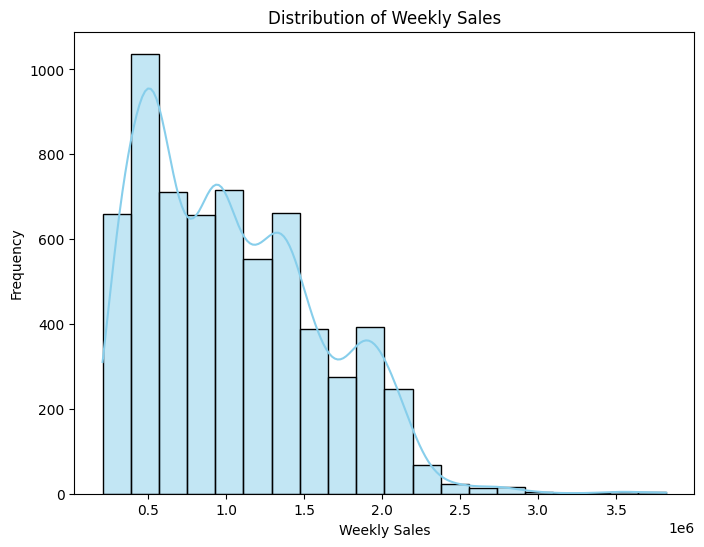

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(Data['Weekly_Sales'], bins=20, kde=True, color='skyblue')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show()

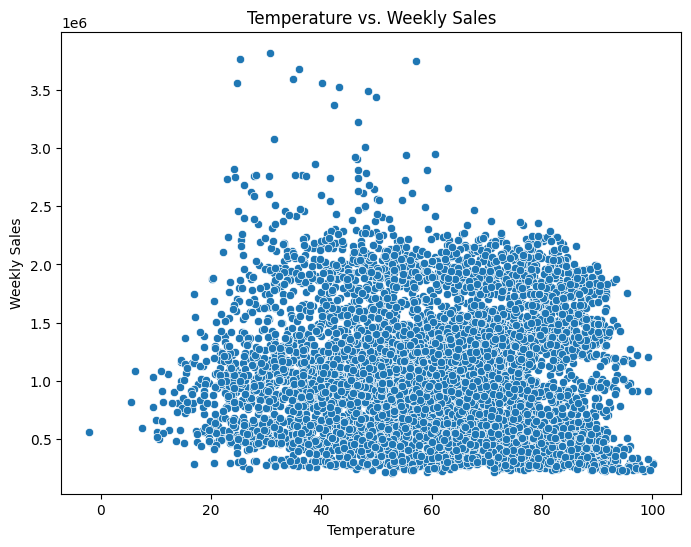

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data= Data)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs. Weekly Sales')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X = Data[['Temperature']]
y = Data['Weekly_Sales']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.0041


In [ ]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(Data['Temperature'], Data['Weekly_Sales'])
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


In [ ]:
# Calculate Pearson correlation and p-value
correlation_coefficient, p_value = pearsonr(Data['Temperature'], Data['Weekly_Sales'])
print(f"P-value: {p_value:.4f}")

# Get the model coefficients
coefficient = model.coef_
print("Coefficients:", coefficient)

P-value: 0.0000
Coefficients: [-1952.41922721]


In [ ]:
coefficient = model.coef_
print("Coefficients:", coefficient)

Coefficients: [-1952.41922721]


An R-squared value of 0.0041 (or 0.41%) indicates that only about 0.41% of the variation in weekly sales can be explained by changes in temperature alone.
In other words, temperature has a very weak association with weekly sales in current model.

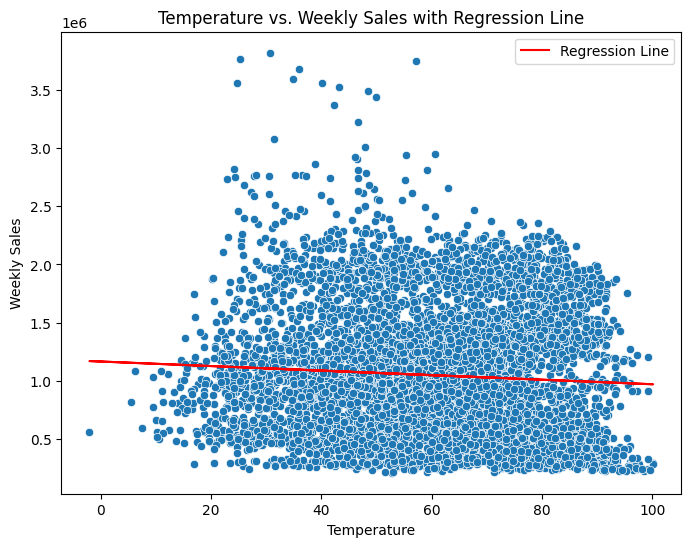

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=Data)
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs. Weekly Sales with Regression Line')
plt.legend()
plt.show()


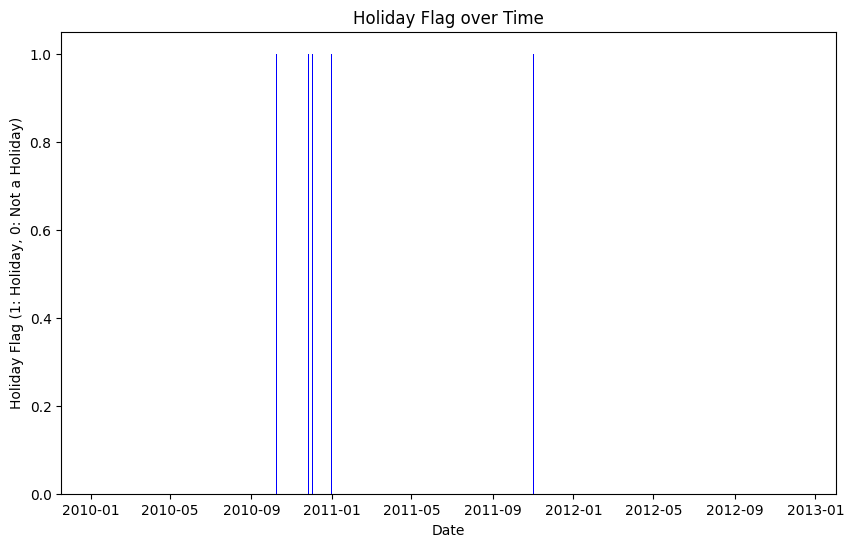

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Data['Date'], Data['Holiday_Flag'], color='blue')
plt.xlabel('Date')
plt.ylabel('Holiday Flag (1: Holiday, 0: Not a Holiday)')
plt.title('Holiday Flag over Time')
plt.show()


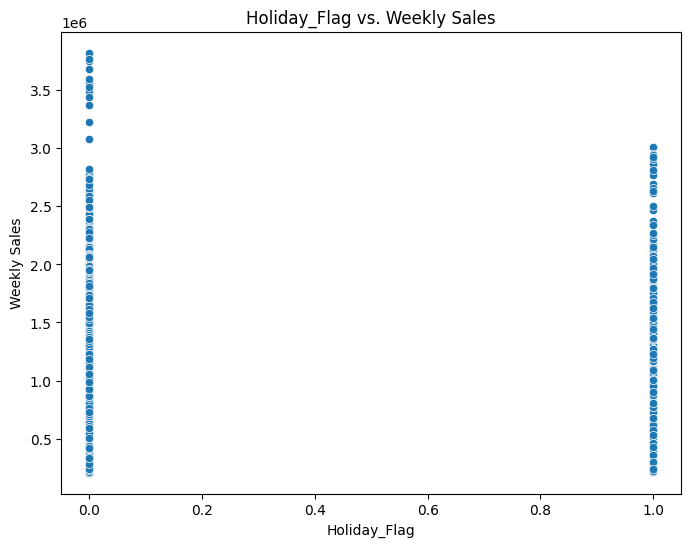

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Holiday_Flag', y='Weekly_Sales', data= Data)
plt.xlabel('Holiday_Flag')
plt.ylabel('Weekly Sales')
plt.title('Holiday_Flag vs. Weekly Sales')
plt.show()

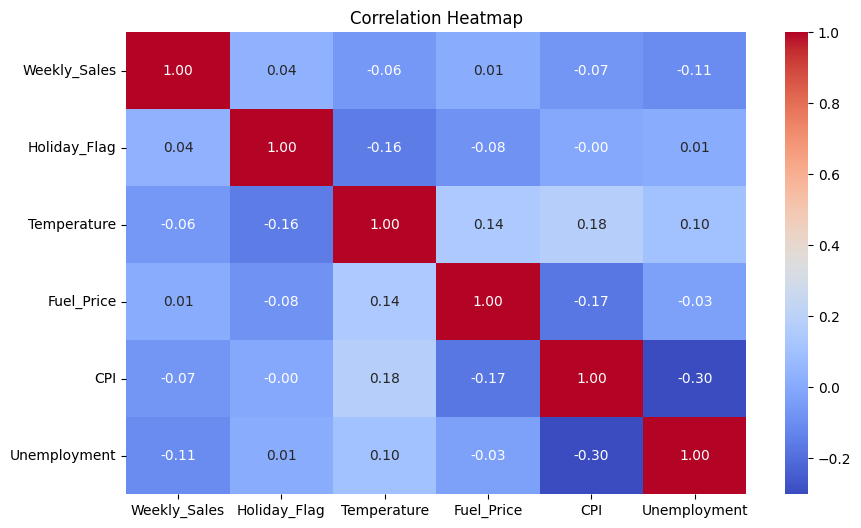

In [ ]:
import seaborn as sns

# Example data (replace with your actual data)
correlation_data = Data[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

# Calculate correlations
corr_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


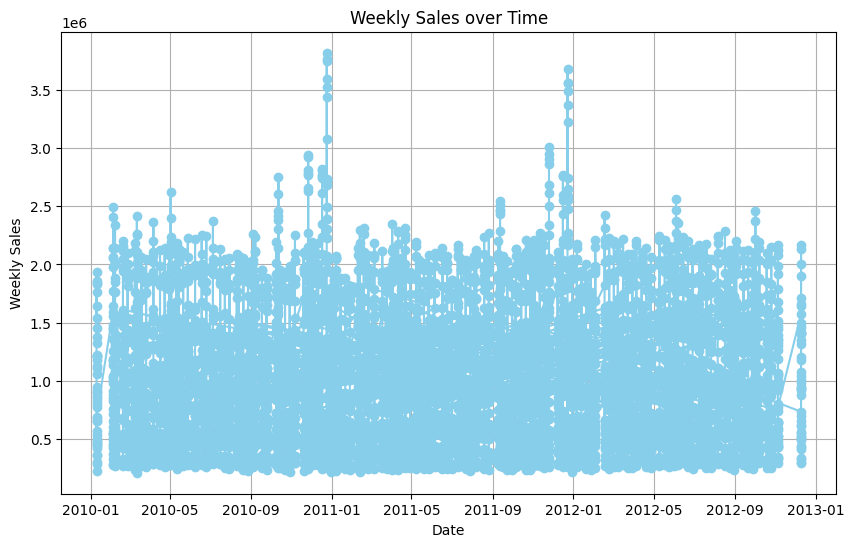

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Data['Date'], Data['Weekly_Sales'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales over Time')
plt.grid(True)
plt.show()

In [ ]:
# Calculate average weekly sales for holiday and non-holiday periods
average_sales_holiday = Data[Data['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
average_sales_non_holiday = Data[Data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

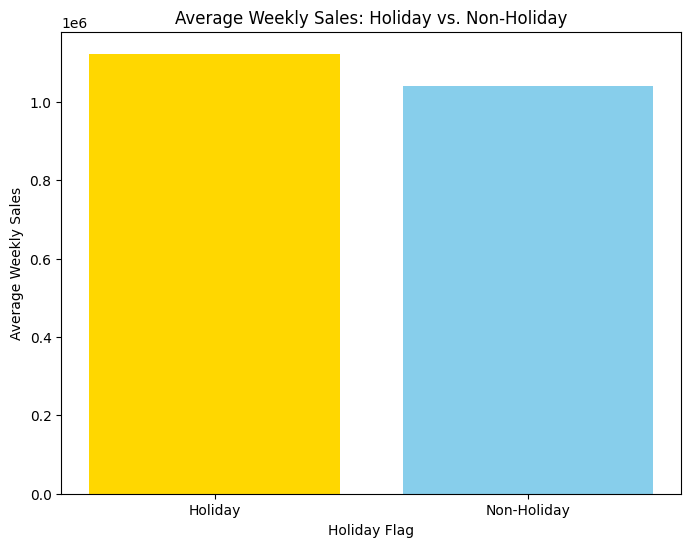

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Holiday', 'Non-Holiday'], [average_sales_holiday, average_sales_non_holiday], color=['gold', 'skyblue'])
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday')
plt.show()

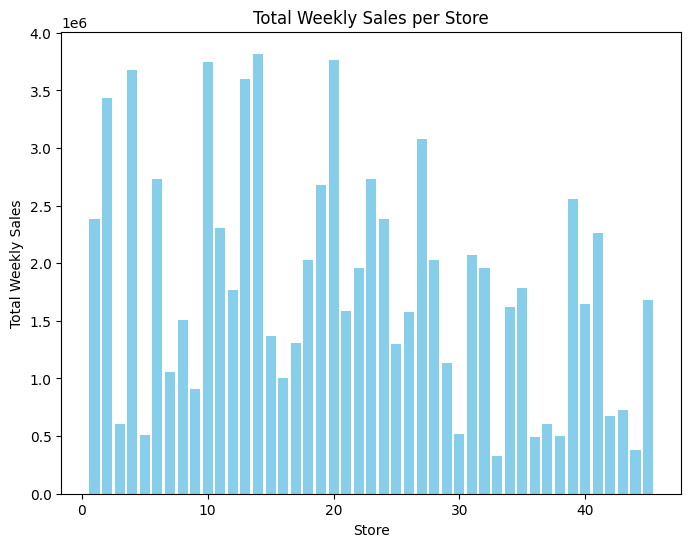

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(Data['Store'], Data['Weekly_Sales'], color='skyblue')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales per Store')
plt.show()

In [ ]:
X_1 = Data[['Store' ,	'Holiday_Flag',	'Fuel_Price',	'CPI',	'Unemployment',	'Temperature']]
y_1 = Data['Weekly_Sales']

model_1 = LinearRegression()
model_1.fit(X_1, y_1)

LinearRegression()

In [ ]:
r_squared = model_1.score(X_1, y_1)
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.1416


In [ ]:
# Coefficients for each feature
coefficients = model_1.coef_
print("Coefficients:", coefficients)

Coefficients: [-15388.66386908  73034.45592814   9596.07385633  -2319.4557703
 -21881.17087118   -975.40194689]


In [ ]:
# Calculate Pearson correlation and p-value
correlation_coefficient, p_value = pearsonr(Data['Holiday_Flag'], Data['Weekly_Sales'])
print(f"P-value: {p_value:.4f}")



P-value: 0.0031
